[(u'Python', 110), (u'python', 100), (u'How', 95), (u'list', 56), (u'string', 43), (u'function', 34), (u'using', 33), (u'code', 29), (u'numbers', 22), (u'What', 21), (u'number', 21), (u'python?', 21), (u'file', 21), (u'loop', 17), (u'find', 15)]


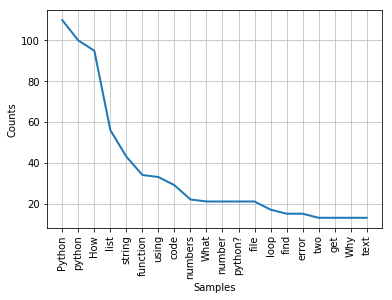

                                             
                                             
[((u'using', u'python'), 8), ((u'python', u'code'), 7), ((u'How', u'find'), 7), ((u'How', u'get'), 6), ((u'python', u'How'), 6), ((u'Python', u'How'), 6), ((u'Python', u'code'), 5), ((u'file', u'using'), 5), ((u'How', u'count'), 5), ((u'python', u'Python'), 4), ((u'string', u'python'), 4), ((u'list', u'python'), 4), ((u'How', u'use'), 4), ((u'error', u'python'), 4), ((u'string', u'list'), 4)]


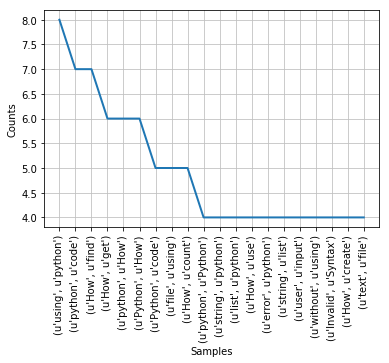

                                             
                                             
[((u'write', u'python', u'code'), 3), ((u'determine', u'length', u'list'), 3), ((u'unsupported', u'operand', u'type(s)'), 3), ((u'How', u'count', u'number'), 2), ((u'another', u'file', u'Python'), 2), ((u'letters', u'string', u'python'), 2), ((u'file', u'using', u'python'), 2), ((u'python?How', u'determine', u'length'), 2), ((u'Python', u'How', u'would'), 2), ((u'literal', u'int()', u'base'), 2), ((u'invalid', u'literal', u'int()'), 2), ((u'list', u'python?How', u'determine'), 2), ((u'index', u'range', u'python'), 2), ((u'file?', u'How', u'find'), 2), ((u'ValueError:', u'invalid', u'literal'), 2)]


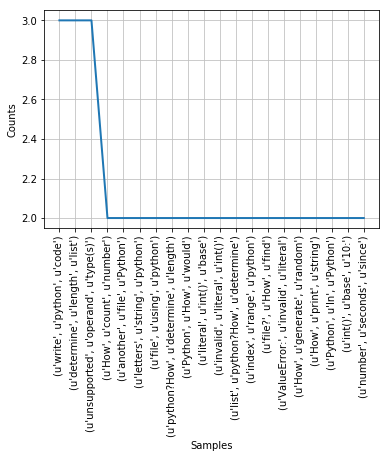

In [3]:
import csv
import nltk
import string
from nltk.corpus import stopwords
from nltk.book import *
from nltk.collocations import *
import pandas as pd
from pandas import DataFrame
from scipy.stats import itemfreq


#topPositive500_questionAndAnswerBody
df = pd.read_csv('/Users/aybuke/Documents/UW MADISON /SPRING2017/2017_CONFERENCE_PAPERS/ICER_2017/NEW/allTimes500_bad.csv', sep=',', low_memory=False, encoding ='latin-1')


data = DataFrame(df)
colmns = data['Title']

#add stop words you show frequently but think they do not have meaning 
stops = set(stopwords.words('english'))
stops.add('that')
stops.add('.')
stops.add(',')
stops.add('-')
stops.add('Is')
stops.add('I')

#make the word list from the text
word_list = []
for line in colmns:
        for words in line.split():
            if words:
                word_list.append(words)

#take out the stop words from the world list
filtered_words = [word for word in word_list if len(word) > 0 and 
                                             word not in stops]
#frequent words 
fdist = FreqDist(filtered_words)
exclude = set(string.punctuation)


text_file = open("stackoverFlow.txt", "w")
for word in filtered_words:
    word = ''.join(ch for ch in word if ch not in exclude).encode('utf-8')
    text_file.write(word + " ")
    
text_file.close()

#print the most common fifteen words
print fdist.most_common(15)
fdist.plot(20, cumulative=False)


print "                                             "
print "                                             "

biWords = nltk.bigrams(filtered_words)
biFdist = nltk.FreqDist(biWords)
print biFdist.most_common(15)
biFdist.plot(20, cumulative=False)


print "                                             "
print "                                             "



TrWords = nltk.trigrams(filtered_words)
TrFdist = nltk.FreqDist(TrWords)
print TrFdist.most_common(15)
TrFdist.plot(20, cumulative=False)














